In [2]:
#!pip install pytransit
#!pip install pyrr

In [1]:
import numpy as np
from math import *
import matplotlib.pyplot as plt
from pytransit import QuadraticModel

# #1

In [2]:
n_points1 = 10**3
n_points2 = 10**6

n_inside1 = 0
n_inside2 = 0

x1 = []
x1_star = []
y1 = []
y1_star = []
for i in range (n_points1):
    x = np.random.uniform(-1,1) # creates our box
    y = np.random.uniform(-1,1)
    if ((x**2 + y**2) <= 1): # creates our circle and checks if a point is inside
        n_inside1 += 1 
        x1_star.append(x)
        y1_star.append(y)
    else:
        x1.append(x)
        y1.append(y)


x2 = []
x2_star = []
y2 = []
y2_star = []
for i in range (n_points2):
    x = np.random.uniform(-1,1) # creates our box
    y = np.random.uniform(-1,1)
    if ((x**2 + y**2) <= 1): # creates our circle and checks if a point is inside
        n_inside2 += 1
        x2_star.append(x)
        y2_star.append(y)
    else:
        x2.append(x)
        y2.append(y)        

pie1 =  4*(n_inside1/n_points1) # our equation for pi!
pie2 =  4*(n_inside2/n_points2)

In [3]:
print ("Our estimate for pi with 10^3 points is pi = ",pie1)
print ("Our estimate for pi with 10^6 points is pi = ",pie2)

Our estimate for pi with 10^3 points is pi =  3.112
Our estimate for pi with 10^6 points is pi =  3.14302


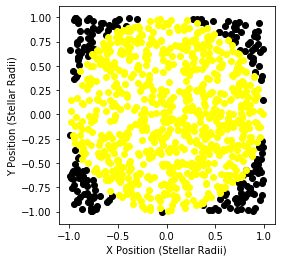

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x1,y1,color = 'black')
plt.scatter(x1_star,y1_star, color = 'yellow')
plt.xlabel("X Position (Stellar Radii)")
plt.ylabel("Y Position (Stellar Radii)")
ax.set_aspect('equal', adjustable='box')

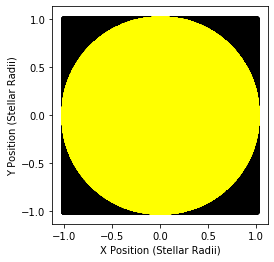

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.scatter(x2,y2,color = 'black')
plt.scatter(x2_star,y2_star, color = 'yellow')
plt.xlabel("X Position (Stellar Radii)")
plt.ylabel("Y Position (Stellar Radii)")
ax.set_aspect('equal', adjustable='box')

##### Now lets find a planet

In [6]:
n_planet = 0 #dots that make planet
n_star = 0 #dots that make star

planet_x = []
planet_y = []
x_arr = []
y_arr = []
star_x = []
star_y = []
n_points = 10**5
for i in range (n_points):
    x = np.random.uniform(-1,1) # creates our box
    y = np.random.uniform(-1,1)
    if ((x**2 + y**2) <= 1): # conditions for star
        n_star += 1
        star_x.append(x)
        star_y.append(y)
    else:
        x_arr.append(x)
        y_arr.append(y)
    if ((x**2 + y**2) <= 1) and ((x - 0.8)**2 + (y + 0.5)**2 <= .01): #conditions for planet
        n_planet += 1 
        planet_x.append(x)
        planet_y.append(y)


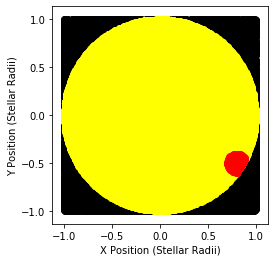

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(x_arr,y_arr,color = 'black')
plt.scatter(star_x,star_y, color = 'yellow')
plt.scatter(planet_x,planet_y,color = 'red')
plt.xlabel("X Position (Stellar Radii)")
plt.ylabel("Y Position (Stellar Radii)")
ax.set_aspect('equal', adjustable='box')

In [8]:
t_depth = n_planet/n_star
print ("According to this set up we see a tranist depth of",round(t_depth*100,3),"%")

According to this set up we see a tranist depth of 0.834 %


##### what if planet was centered?

In [9]:
n_planet = 0 #dots that make planet
n_star = 0 #dots that make star

planet_x = []
planet_y = []
x_arr = []
y_arr = []
star_x = []
star_y = []
n_points = 10**5
for i in range (n_points):
    x = np.random.uniform(-1,1) # creates our box
    y = np.random.uniform(-1,1)
    if ((x**2 + y**2) <= 1): # conditions for star
        n_star += 1
        star_x.append(x)
        star_y.append(y)
    if ((x**2 + y**2) <= 1) and ((x)**2 + (y)**2 <= (.1)**2): #conditions for planet
        n_planet += 1 
        planet_x.append(x)
        planet_y.append(y)
    else:
        x_arr.append(x)
        y_arr.append(y)

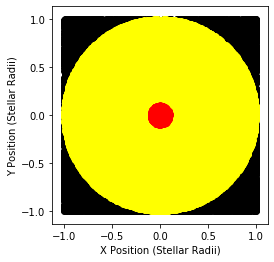

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(x_arr,y_arr,color = 'black')
plt.scatter(star_x,star_y, color = 'yellow')
plt.scatter(planet_x,planet_y,color = 'red')
plt.xlabel("X Position (Stellar Radii)")
plt.ylabel("Y Position (Stellar Radii)")
ax.set_aspect('equal', adjustable='box')

In [11]:
t_depth = n_planet/n_star
print ("According to this set up we see a tranist depth of",round(t_depth*100,3),"%")

According to this set up we see a tranist depth of 0.972 %


In [12]:
#voila we get our expected 1% dip!, how can we get to within 10% of 1% in the original problem?
#After running code a couple of times I determined you would need >10**9 n_points which was too much computing time!!!

# #2

In [13]:
G = 6.67E-8                 ##units: cm**3 / g / s**2
cm_per_AU = 1.5E13          ##units: cm
Msun = 2.0E33                ##units: g
s_per_day = 60. * 60. * 24. ##units: s
s_per_hour = 60*60
Rsun = 6.9634*10**10        ##radius in cm (radius of sun)
Rearth = 6.371*10**8        ##radius of earth in cm
Mearth = 5.976*10**27       ## mass of earth in grams
deg_to_rad = pi/180

In [14]:
# My top secret paramters
Mstar = 1.3 #solar masses
Rstar = 1.1 #solar radii
P = 9.923 #days
inc = 89.24 #degrees
ecc = 0.37 
w = 4.216 #degrees
Rp = 2.36 #Earth radii
Mp = 7.48 #Earth mass

In [15]:
P = P*s_per_day
Mstar = Mstar * Msun
Rstar = Rstar*Rsun
Rp = Rp * Rearth
Mp = Mp*Mearth
w = w * deg_to_rad + (pi/2)
inc = inc * deg_to_rad

In [16]:
#lets find a using Keplers 3rd law! Then find b using a!
a = ( (G * (Mstar+Mp) * P**2)  / (4 * pi**2) )**(1/3)
b = ((a*(1-ecc))/Rstar)*np.cos(inc)
print ("The planet has an orbital radius of",round(a/cm_per_AU,4),"AU, and an impact paramter of b = ",round(b,3))

The planet has an orbital radius of 0.0985 AU, and an impact paramter of b =  0.161


In [17]:
nstep = 100
transit_t_arr = [] #time when planet is transiting!
theta = 0 #starts loop before planet is in transit!
t = 0
dt = P / (nstep-1) #time step
theta_arr = []
rarr = [] #distances from focus
xarr = [] # x values in Cart
yarr = [] # y values
vrad_arr = []
tarr =[]
thet_max = []
vp_arr= []
for i in range (0,100):
    #Calculate distance of object from principle focus   
    r = a*(1 - ecc**2)/(1 + ecc*cos(theta-w))
    #vrad = K * (ecc*cos(w)-cos(theta-w))
    #vrad_arr.append(vrad)
    
    #Calculate cartesian coordinates and save to array
    x = r*cos(theta-w)/cm_per_AU
    y = r*sin(theta-w)/cm_per_AU
    
    rAU = r / cm_per_AU
    
    rarr.append(rAU)
    xarr.append(x)
    yarr.append(y)
    
    #Update time  
    t += dt
    tarr.append(t)
    
    #Calculate angular momentum per unit mass. 
    LoM = np.sqrt(G*Mstar*a*(1 - ecc**2))
    vp = LoM / (r)
    vp_arr.append(vp)
    #Calculate next theta value based on ang. momentum per unit mass.
    theta_arr.append (theta)
    dtheta = LoM*dt/r**(2)
    theta += dtheta
    
theta_arr = np.array(theta_arr)
theta_arr *= (180/pi) #converts back to deg

In [18]:
D = 2*Rstar / vp_arr[0] #transit duration in s
print ("The approximate time of transit is",round(D/s_per_hour,2),"hours.")
print ("The planet's velocity at transit is",round(vp_arr[0],2),"cm/s")

The approximate time of transit is 3.75 hours.
The planet's velocity at transit is 11342235.81 cm/s


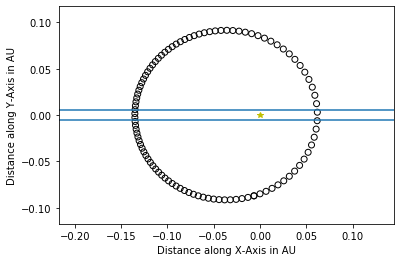

In [19]:
ymin = - (Rstar/cm_per_AU)
ymax = (Rstar/cm_per_AU)
fig = plt.figure()
plt.axis('equal')
plt.xlabel("Distance along X-Axis in AU")
plt.ylabel("Distance along Y-Axis in AU")
plt.axhline(y = ymin)
plt.axhline(y = ymax)
plt.scatter(xarr, yarr, facecolors = 'none', edgecolors = 'black')                                              
plt.plot(0, 0, 'y*') 
plt.show()

In [20]:
#2-b

In [21]:
period=9.923 #insert your period here in days

##### DO NOT ALTER THIS. This snippet of code calculates the time array you should use to generate your lightcurves, 
#both from scratch and using exisiting python packages
M_star_low=0.1
M_star_high=10.0

R_high=((M_star_high)**0.57)*Rsun #MR scaling relations for MS stars
R_low=((M_star_low)**0.8)*Rsun

a_high=(((period*s_per_day)**2.0*G*M_star_high*Msun)/(4*np.pi**2.0))**(1.0/3.0)
a_low=(((period*s_per_day)**2.0*G*M_star_low*Msun)/(4*np.pi**2.0))**(1.0/3.0)

duration_high=period*s_per_day/np.pi*(R_high/a_high)
duration_low=period*s_per_day/np.pi*(R_low/a_low)

#Calculating number of 1 min exoposure needed for a 3 hour duration window, 
#if eccentricity is as high as 0.9 and planet transits at apastron
n_high=3*duration_high*(np.sqrt(1-0.9**2)/(1-0.9))/60.
n_low=3*duration_low*(np.sqrt(1-0.9**2)/(1-0.9))/60.

single_transit_time_array=(np.arange(0,n_high)-n_high/2.0)/(60*24) #Use this time array to produce your homemade transit light curve (Due 4/9)

#Use the time array below to eventually produce the time array for the lightcurve you will share with a classmate
time_array=np.concatenate(((np.arange(0,n_high)-n_high/2.0)/(60*24),(np.arange(0,n_high)-n_high/2.0)/(60*24.0)+period)) 
time_array=np.concatenate((time_array,(np.arange(0,n_high)-n_high/2.0)/(60*24)+period*2.0))

In [22]:
vtransit = vp_arr[0] 
x_of_planet = vtransit*(single_transit_time_array*s_per_day)
x_planet_star = (x_of_planet / Rstar)

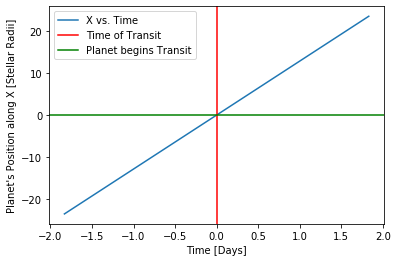

In [23]:
plt.plot(single_transit_time_array,x_planet_star,label='X vs. Time')
plt.axvline(x=0,color = 'r', label='Time of Transit')
plt.axhline(y=0,color = 'g',label='Planet begins Transit')
plt.xlabel("Time [Days]")
plt.ylabel("Planet's Position along X [Stellar Radii]")
plt.legend()

In [24]:
#2-c

In [25]:
x_star = np.random.uniform(-1,1,10**6)
y_star = np.random.uniform(-1,1,10**6)

In [26]:
n_planet = 0
n_star = 0
Flux_arr = []
b = (a/Rstar)*cos(inc)
for i in (x_planet_star):
    
    star = (x_star**2+y_star**2) <= 1
    n_star = len(x_star[star])
    
    planet = np.where((((x_star-i)**2 + (y_star-b)**2) <= (Rp/Rstar)**2) & ((x_star**2+y_star**2) <= 1 ))
    n_planet = len(x_star[planet])
    
    
    depth = (n_planet/(n_star+n_planet))
    flux = 1 - depth
    
    
    
   
    
    Flux_arr.append(flux)

Text(0, 0.5, 'Flux')

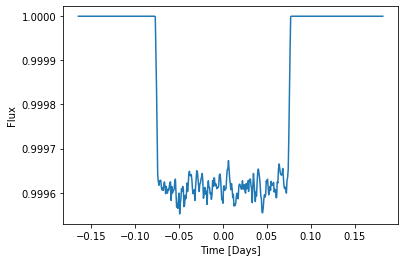

In [27]:
plt.plot(single_transit_time_array[2400:2900],Flux_arr[2400:2900])
plt.xlabel('Time [Days]')
plt.ylabel('Flux')

In [28]:
#2-d

In [29]:
tm = QuadraticModel()
tm.set_data(single_transit_time_array) #time needs to be specified in days
t0=0
inc= inc #90 degrees is perfectly edge-on
aonr=a/Rstar
k=Rp/Rstar #R_p/R_star
period=P/s_per_day #days
print (period)
lightcurve_high=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=0.0, p=period, a=aonr, i=inc,e=ecc,w=w-(pi/2))

9.923


Text(0, 0.5, 'Flux')

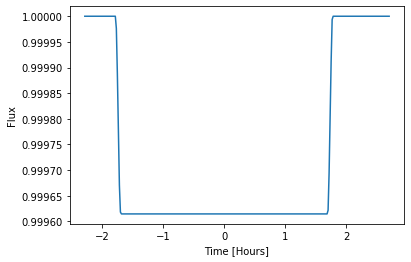

In [30]:
plt.plot(single_transit_time_array[2500:2800]*24,lightcurve_high[2500:2800])
plt.xlabel('Time [Hours]')
plt.ylabel('Flux')

Text(0, 0.5, 'Flux')

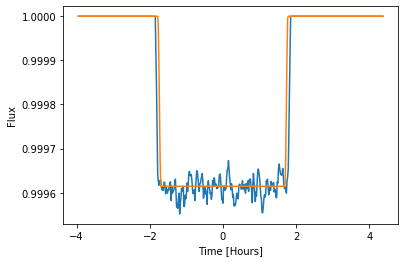

In [31]:
plt.plot(single_transit_time_array[2400:2900]*24,Flux_arr[2400:2900])
plt.plot(single_transit_time_array[2400:2900]*24,lightcurve_high[2400:2900])
plt.xlabel('Time [Hours]')
plt.ylabel('Flux')

# CSV PART

In [32]:
import csv 
from numpy import savetxt
from numpy import loadtxt

In [33]:
time_array=np.concatenate(((np.arange(0,n_high)-n_high/2.0)/(60*24),(np.arange(0,n_high)-n_high/2.0)/(60*24.0)+period)) 
time_array=np.concatenate((time_array,(np.arange(0,n_high)-n_high/2.0)/(60*24)+period*2.0))

In [34]:
tm.set_data(single_transit_time_array)
single_transit_lightcurve=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=0.0, p=period, a=aonr, i=inc,e=ecc,w=w-(pi/2))

In [35]:
tm.set_data(time_array) #time needs to be specified in days
three_transit_lightcurve=tm.evaluate(k=k, ldc=[0.0, 0.0], t0=0.0, p=period, a=aonr, i=inc,e=ecc,w=w-(pi/2))

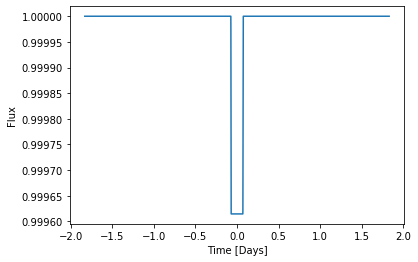

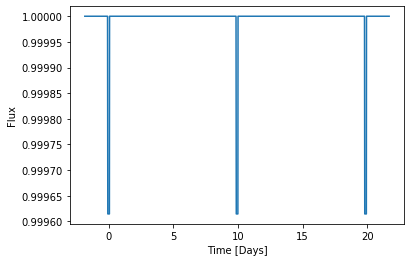

In [36]:
plt.plot(single_transit_time_array,single_transit_lightcurve)
plt.xlabel('Time [Days]')
plt.ylabel('Flux')
plt.show()

plt.plot(time_array,three_transit_lightcurve)
plt.xlabel('Time [Days]')
plt.ylabel('Flux')
plt.show()


In [43]:
# recall our transit depth: pick a random number between 10-20
# noise = depth / number 
#my number will be 12
depth = (Rp/Rstar)**2
snr = depth/12
snr

3.21092316556504e-05

In [44]:
test_time_array=time_array     #Time array including three transits

noise=np.random.normal(0., snr,(len(time_array)))#Replace with an array of actual Gaussian noise
test_flux_array = three_transit_lightcurve+noise #Flux array from PyTransit, including three transits, with noise on top

test_error_array=np.zeros(len(time_array)) 
test_error_array.fill(snr) #Replace 0.0 with your random error value
    
test_rows=np.transpose([test_time_array,test_flux_array,test_error_array])

#The line below writes your time, flux, and error arrays to a CSV file
#EDIT THE STELLAR MASS AND STELLAR RADIUS IN THE FILENAME TO YOUR OWN VALUES
savetxt('stellar_mass_1.3_stellar_radius_1.1.csv', test_rows, delimiter=',') #replace stellar mass and radius in filename with your values

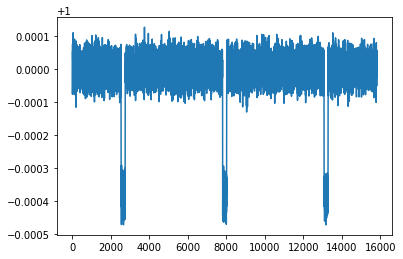

In [42]:
plt.plot(test_flux_array)